In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import SMAIndicator, MACD
from ta.momentum import RSIIndicator
# import pynance as pn
import yfinance as yf


In [2]:
# Load data
df = pd.read_csv("../data/AMZN.csv")

# Parse dates and sort
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Preview data
df.head()

,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.718,2.7265,2.5535,2.5675,145928000
1,2009-01-05,2.703,2.7870,2.6515,2.7865,190196000
2,2009-01-06,2.868,2.9110,2.6875,2.7275,221602000
3,2009-01-07,2.810,2.8475,2.7675,2.8145,158854000
4,2009-01-08,2.858,2.8660,2.7290,2.7495,131558000


In [3]:
#Calculate Technical Indicators (SMA, RSI, MACD)

# SMA
df["SMA_20"] = SMAIndicator(close=df["Close"], window=20).sma_indicator()
df["SMA_50"] = SMAIndicator(close=df["Close"], window=50).sma_indicator()

# RSI
df["RSI"] = RSIIndicator(close=df["Close"], window=14).rsi()

# MACD
macd = MACD(close=df["Close"])
df["MACD"] = macd.macd()
df["MACD_Signal"] = macd.macd_signal()
df["MACD_Diff"] = macd.macd_diff()

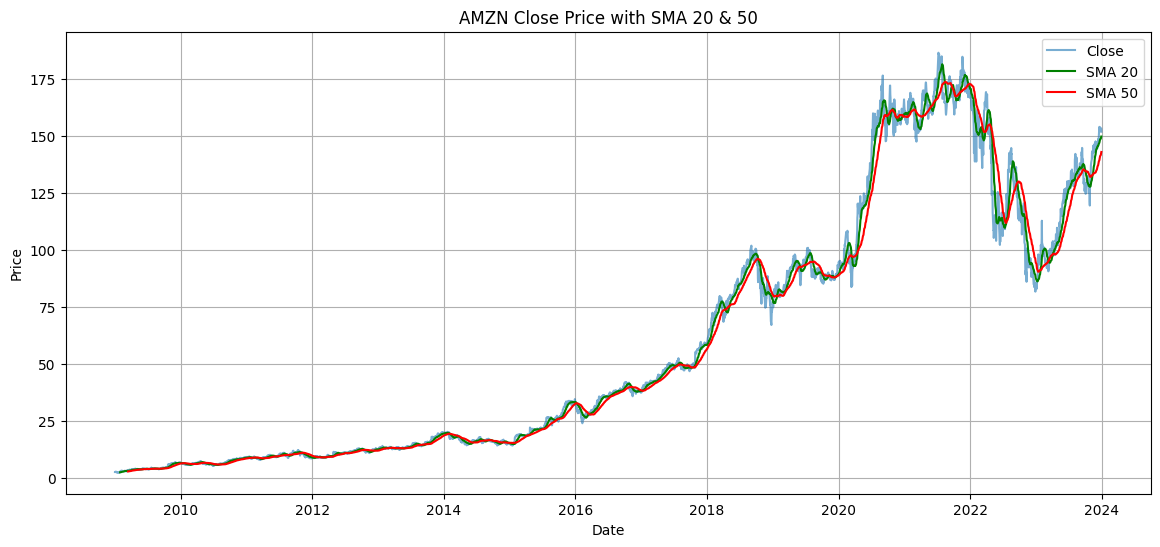

In [4]:
# Visualize Indicators
# Plot 1: Price + Moving Averages

plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Close"], label="Close", alpha=0.6)
plt.plot(df["Date"], df["SMA_20"], label="SMA 20", color="green")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50", color="red")
plt.title("AMZN Close Price with SMA 20 & 50")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

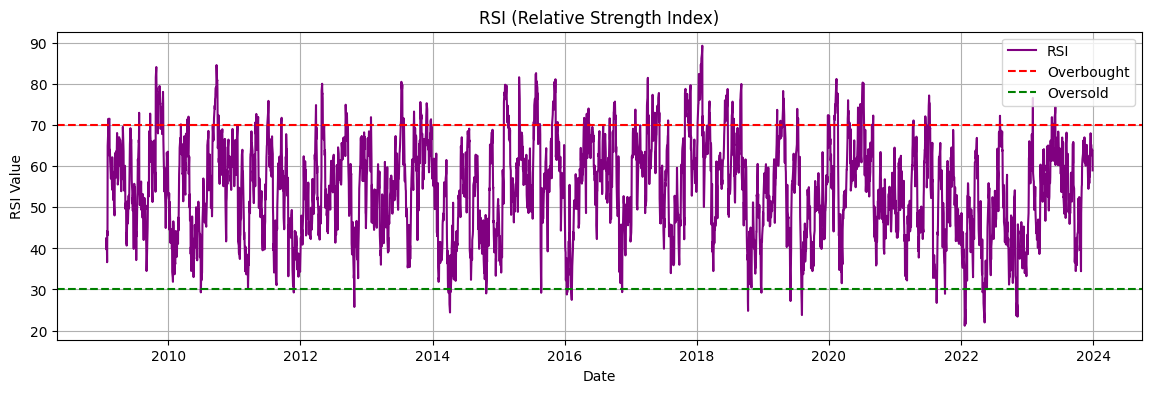

In [5]:
#RSI

plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle='--', color='red', label="Overbought")
plt.axhline(30, linestyle='--', color='green', label="Oversold")
plt.title("RSI (Relative Strength Index)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()

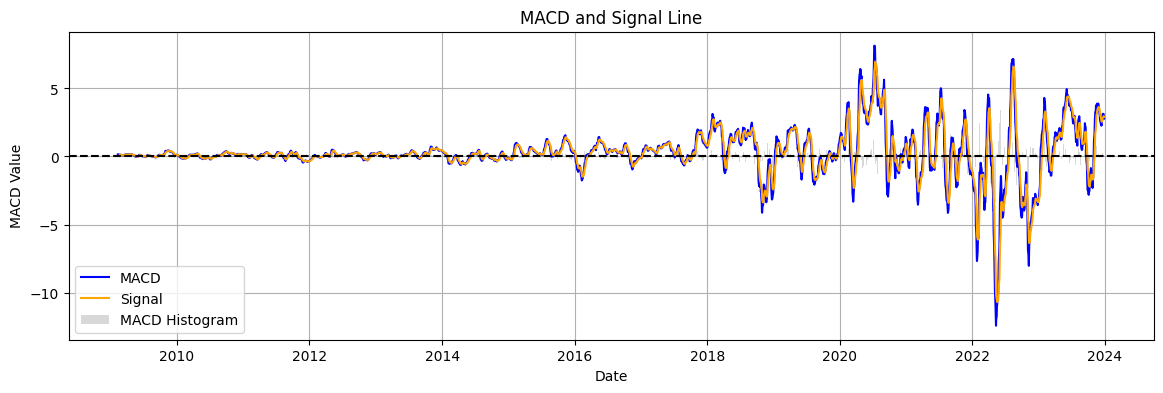

In [6]:
#Plot 3: MACD

plt.figure(figsize=(14, 4))
plt.plot(df["Date"], df["MACD"], label="MACD", color="blue")
plt.plot(df["Date"], df["MACD_Signal"], label="Signal", color="orange")
plt.bar(df["Date"], df["MACD_Diff"], label="MACD Histogram", color="gray", alpha=0.3)
plt.axhline(0, linestyle="--", color="black")
plt.title("MACD and Signal Line")
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.legend()
plt.grid(True)
plt.show()